Movie reviews obtained through the API for The Movie Database (TMDB) : https://developer.themoviedb.org

In [11]:
# imports
import requests
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd, numpy as np
pd.set_option('display.max_rows', None) # show all rows
pd.set_option('display.max_colwidth', 10000) # show full width of columns

In [12]:
# variables
api_key = os.environ.get("API_KEY")
base_url = "https://api.themoviedb.org/3"

### Retrieving the data

In [13]:
# Store all movies currently playing into an array

# Each API call can display one page which corresponds to 20 results. 
# We can find the maximum number of pages when we make a single query at page 1, the total number of remaining pages is listed as the penultimate element of the results array.
def total_pages():

    pages=0
    
    params={
        "api_key": api_key,
        "page":1
        }
    response = requests.get(f"{base_url}/movie/now_playing", params=params)
    data = response.json()
    if response.status_code == 200:
        pages = data['total_pages'] + 1
        return pages
    else:
        print("Error", response.status_code, "\n", response.text)


# Let's define a function and specify the number of loops to be the maximum number of page.
def movie_list(page):
    
    movies =[]

    for i in range(1, page+1):
        params={
            "api_key": api_key,
            "page":i
            }
        response = requests.get(f"{base_url}/movie/now_playing", params=params)
        data = response.json()

        # Let's store the movie title and movie_ID into the movies array
        if response.status_code == 200:
            for movie in data['results']:
                movies.append({movie['title']: movie['id']})
        else:
            print("Error", response.status_code, "\n", response.text)
    return movies


# combine both functions and retrieve all movies currently playing
movies = movie_list(total_pages())

# display(movies)
# print(len(movies))

In [14]:
# Extract the reviews for each movie (as of march 2024, it's about 4000 movies, so the query can take up to 6 minutes)

params = {"api_key": api_key}

def movie_reviews(movies):

    reviews =[]

    for m in movies:

        title = str(list(m.keys())[0])
        response = requests.get(f"{base_url}/movie/{list(m.values())[0]}/reviews", params=params)
        data = response.json()

        if ('results' in data) and (data['results']):   # if there is a 'results' array in the json file and if that array is not empty
            for review in data['results']:
                author = review.get('author', None)
                content = review.get('content', None)
                rating = review['author_details'].get('rating', np.nan)
                reviews.append([title, author, content, rating])

    return reviews

reviews = movie_reviews(movies)

In [15]:
# Store the result in a dataframe

df =pd.DataFrame(reviews)
df.columns=['movie_title','reviewer','review', 'rating_given']


In [16]:
# perform EDA on our new dataframe
display(df.head())
display(df.tail())
display(df.shape)
display(df.describe(include='all'))
df.info()

# view null values
print('\nNumber of null values is :')
print(df.isna().sum())

# view number of duplicates
print('\nNumber of duplicates is:', df.duplicated().sum())


,movie_title,reviewer,review,rating_given
0,Kung Fu Panda 4,Chris Sawin,"_Kung Fu Panda 4_ isn’t the best _Kung Fu Panda_ film, or even the best of the series’ three sequels. However, as a fourth film in a franchise, it’s a ton of fun.\r\n\r\nAnd though it’s action isn’t quite as entertaining as its predecessors and it’s unfortunate to see Awkwafina playing yet another thief (_Jumanji: The Next Level_ says hello), for the most part, _Kung Fu Panda 4_ happily skadooshes its way to animated greatness.\r\n\r\n**Full review:** https://bit.ly/KuFuPa4",6.0
1,Damsel,thorian93,"Today I enjoyed: Damsel.\r\n\r\nDamsel is a Netflix Original, that was released just a few days ago. Starring a strong cast with Millie Bobby Brown, Robin Wright, Angela Bassett and the voice of Shohreh Aghdashloo it follows the odyssey of Elodie. I am not going to spoil the plot for you, but I bet you can foresee most developments, dear reader.\r\n\r\nOverall I have mixed feelings. The story is nothing new, most elements are well known for this kind of movie. Some decisions of characters (including the dragon) feel dumb, and sometimes our main character gets very lucky, so the rest of the plot can happen. The CGI ranges from poor to pretty good, poor more in the begging, with huge landscapes and castles, but later, when the dragon makes an appearance, it looks pretty decent. But I was watching on a rather small screen and Netflix is punishing me with mediocre quality for some time now. So take my visual rating with a grain of salt. Now one thing I will say about the dragon: It has an interesting spin to it. For one thing, half of the time, we do not really see it and only hear Shohreh Aghdashloo's deep, rasping voice, bringing it to life. And when we actually see the dragon, it has a slight horror touch if you will. It looks like a hybrid between your average majestic and broadly loved dragon and something more dark and slimy. A muskrat comes to mind. I liked that (sort of).\r\n\r\nOne remark towards the title: While it is obviously a play the well known 'Damsel in distress' and obviously Elodie fights instead of needing to be rescued, she screams a lot and actually seems in distress half of the film. Until she suddenly becomes the hero and single-handedly fights the dragon. It is a bit much and hard to believe.\r\n\r\nThis is in all honesty an average movie. It is neither terrible nor great. If you are in the mood for some imagery, gold and jewels, dragons, princesses, and a few swords, then go for it. There are worse ways to spend roughly 109 minutes. But there are also better ways.\r\n\r\n_Originally posted on my blog: https://robingierse.de/blog/tie-damsel._",6.5
2,Damsel,Manuel São Bento,"FULL SPOILER-FREE REVIEW @ https://talkingfilms.net/damsel-review-a-generic-yet-immersive-fantasy-flick/\r\n\r\n""Damsel attempts to deliver a tale of empowerment and adventure within the rich fantasy genre but finds itself entangled in the ropes of predictability and missed opportunities for deeper narrative innovation.\r\n\r\nDespite its shortcomings, the film shines through its technical prowess, from visually stunning effects to immersive world-building, and is anchored by Millie Bobby Brown’s compelling lead performance.\r\n\r\nWhile it may not redefine its genre or leave an indelible mark on the history of cinema, it’s a pleasant home viewing with moments of genuine charm and resilience.""\r\n\r\nRating: B-",6.0
3,Argylle,Manuel São Bento,"FULL SPOILER-FREE REVIEW @ https://talkingfilms.net/argylle-review-a-delightful-surprise-of-campy-entertainment/\r\n\r\n""Argylle emerges as a (very) pleasant surprise this new year, blending absurdity with sophistication to create a truly memorable cinematic experience.\r\n\r\nMatthew Vaughn's vision, combined with Jason Fuchs' sharp, clever screenplay, provides an entertainment rollercoaster ride that obliterates initial expectations. From unexpected twists and turns to the incredibly charismatic cast, not to mention a third ac

,movie_title,reviewer,review,rating_given
411,Love Stories,MD SABBIR HOSSAIN,1. Dukkhito by Kajol Arefin Ome: **2.5**/5;\r\n\r\n2. Extra by Vicky Zahed: **2**/5;,6.0
412,Bag of Patience,notprasun_,"The mind of Sameer Rai fascinates me, and this is coming from someone who just watched Poor Things like an hour ago.",NaN
413,The Seven Seas of Sage,thecabbageboy,"The film is a celebration of the inherent dramatism and queerness of Southeast Asia history, as well as a wonderful exploration of the trope of found family. The characters are hilarious, complex and so well-explored within a short runtime; at first glance, the titular character (as advertised) is a silly babygirl, and over time, we get to see the nuance in every interaction! The dynamics are absolutely insane, everybody is so different and yet, their relationships manage to bring out the best in each other. Overall, fantastic writing, amazing creative direction, 100/10 would recommend",NaN
414,Dirty Vote,yahyaharyantoo,"go deeper into the schemes of the ruling power,\r\n\r\nI just found out about the partition of the province of Papua from this movie, and it was also used for votes. horrifying.\r\nlet's vote wisely, https://www.bijakmemilih.id/en/",8.0
415,Vice News Presents: Mass Shooting America,reelfilmophile,Tragically relevant…praying for Kansas City right now,7.0


(416, 4)

,movie_title,reviewer,review,rating_given
count,416,416,416,391.000000
unique,166,110,389,NaN
top,Oppenheimer,CinemaSerf,"<em>'The Iron Claw'</em> is quite the depressing watch!\r\n\r\nA lot of the story you can see coming from a decent ways away, even for someone like me who previously knew nothing about this family, but that only adds to the tinge of sadness that is present in the film from pretty much the get-go. The film does a grand job at making sure that events onscreen move along at a good pace, especially as some parts could've (but don't) felt repetitive if told differently.\r\n\r\nThere's an excellent showing from Zac Efron in this, such a great performance from that man. I also appreciated Holt McCallany, as well as the likes of Jeremy Allen White and Harris Dickinson. The Von Erich family are portrayed well, though it is a shame that I read that they left out brother Chris - I do get the reasoning as to why, but I feel like they should've found a way to at least acknowledge his existence.\r\n\r\nAll things considered, though, this 2023 release is tremendous. Highly recommended.",NaN
freq,20,107,2,NaN
mean,NaN,NaN,NaN,6.879795
std,NaN,NaN,NaN,1.829845
min,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,6.000000
50%,NaN,NaN,NaN,7.000000
75%,NaN,NaN,NaN,8.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_title   416 non-null    object 
 1   reviewer      416 non-null    object 
 2   review        416 non-null    object 
 3   rating_given  391 non-null    float64
dtypes: float64(1), object(3)
memory usage: 13.1+ KB

Number of null values is :
movie_title      0
reviewer         0
review           0
rating_given    25
dtype: int64

Number of duplicates is: 27


In [17]:
# handle missing values by filling with mean
# df['rating_given'].fillna(df['rating_given'].mean(), inplace=True)

# display(df)


In [18]:
# removing unwanted characters from the review texts
df2 = df.copy()
df2['review'].replace(['\n','\r', '@', '_', '\*'], '', regex=True, inplace=True)
df2['review']=df2['review']

# display(df2[['review']])

In [19]:
# view the duplicates
# display(df2[df2.duplicated(subset='review', keep=False)])

# drop the duplicates
df2.drop_duplicates(inplace=True)

# view the new shape
display(df2.shape)

(389, 4)

Out of almost 4000 movies, we only have about 10% of that as reviews.

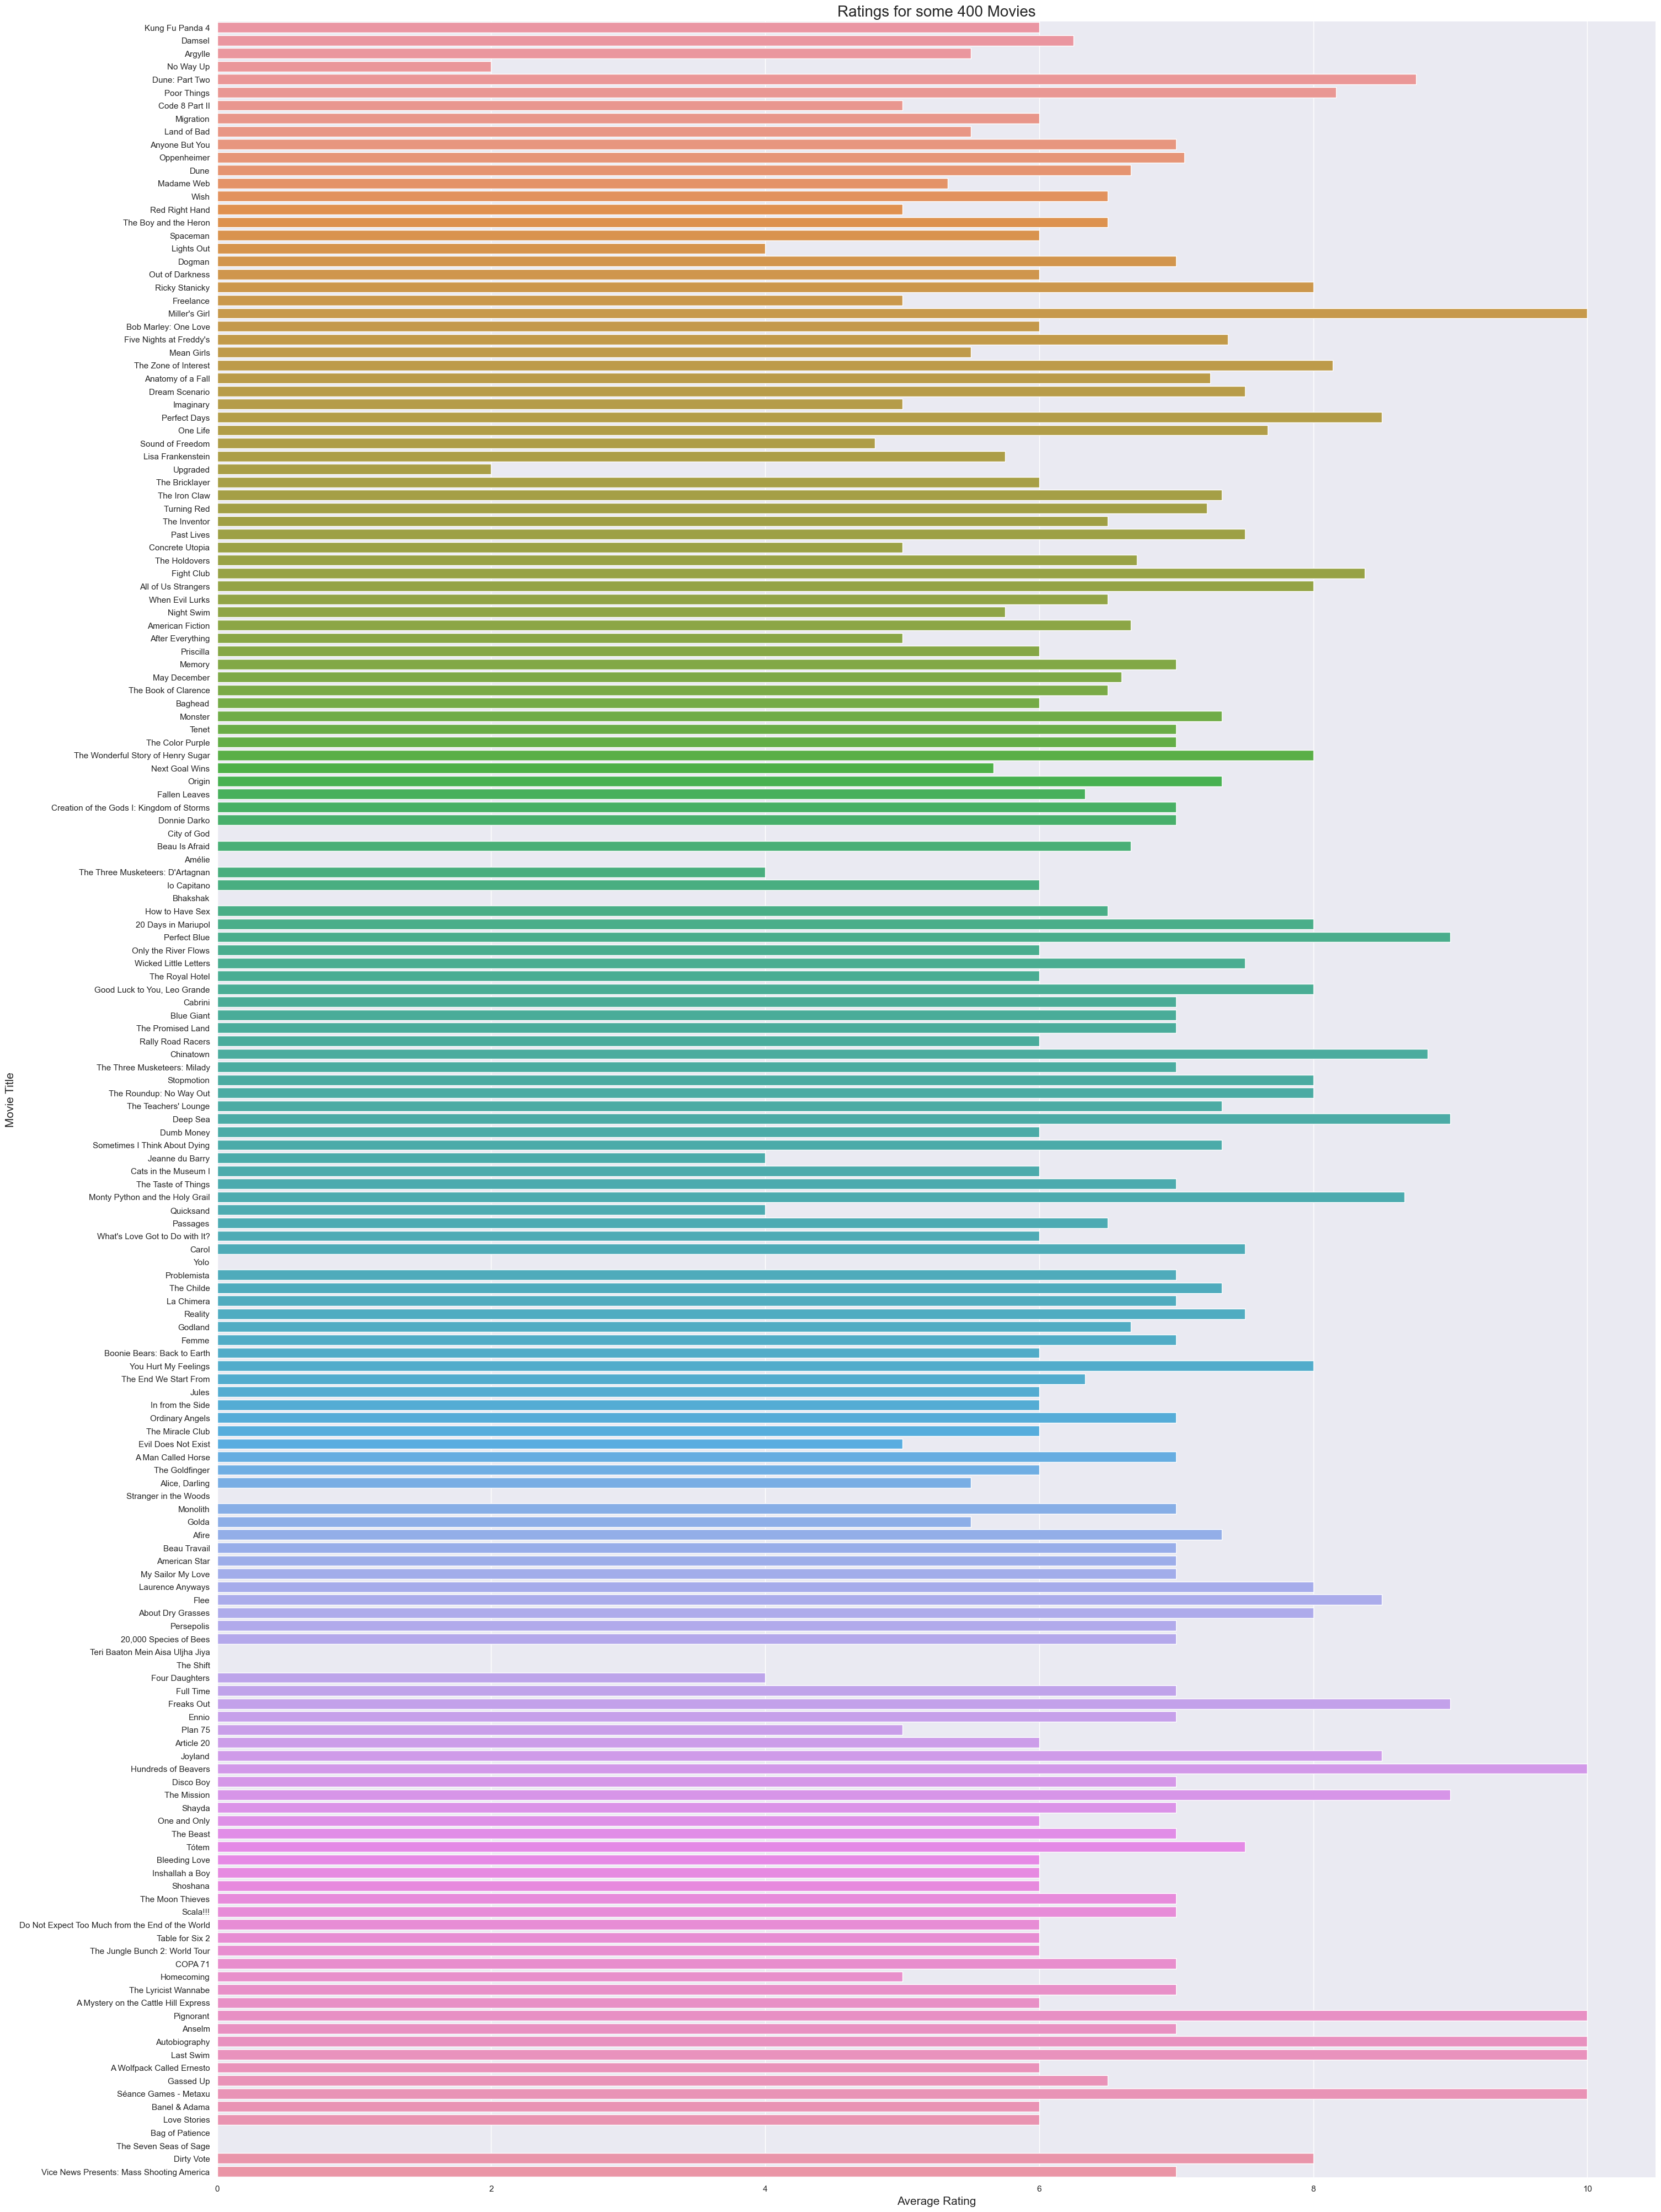

In [56]:
# Let's plot the ratings VS movie_title

plt.figure(figsize=(30, 40), constrained_layout=True) 
sns.barplot(y='movie_title', x='rating_given', errorbar=None, data=df2)
plt.ylabel('Movie Title', fontsize=15)
plt.xlabel('Average Rating', fontsize=15)
plt.title('Ratings for some 400 Movies', fontsize=20)
# plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()


### Sentiment Analysis with TextBlob
Doc : https://textblob.readthedocs.io/en/dev/


In [21]:
# First, let's convert the given rating to a sentiment
# We assume that if the actual rating is >5, it's positive, <5 is negative, == 5 is neutral, otherwise N/A.

def sentiment(rating):
    if rating > 5:
        return 'positive'
    elif rating <5:
        return 'negative'
    elif rating == 5:
        return 'neutral'
    else:
        return 'N/A'

# Create a new column on our dataframe that will be the result of the function applied on the 'review' column
df2['sentiment'] = df2['rating_given'].apply(sentiment)

# display(df2.head())
# display(df2.tail())

In [22]:
# %pip install textblob

In [23]:
# Now let's perform sentiment analysis on the 'review' column using TextBlob

from textblob import TextBlob

# Create a new function that can be applied on a dataframe column
def textblob_sentiment(text):
    blob = TextBlob(text)
    score = blob.sentiment.polarity
    if score >0:
        return 'positive'
    elif score <0:
        return 'negative'
    else:
        return 'neutral'

# Create a new column on our dataframe that will be the result of the function applied on the 'review' column
df2['textblob_sentiments'] = df2['review'].apply(textblob_sentiment)

display(df2.head())
display(df2.tail())

,movie_title,reviewer,review,rating_given,sentiment,textblob_sentiments
0,Kung Fu Panda 4,Chris Sawin,"Kung Fu Panda 4 isn’t the best Kung Fu Panda film, or even the best of the series’ three sequels. However, as a fourth film in a franchise, it’s a ton of fun.And though it’s action isn’t quite as entertaining as its predecessors and it’s unfortunate to see Awkwafina playing yet another thief (Jumanji: The Next Level says hello), for the most part, Kung Fu Panda 4 happily skadooshes its way to animated greatness.Full review: https://bit.ly/KuFuPa4",6.0,positive,positive
1,Damsel,thorian93,"Today I enjoyed: Damsel.Damsel is a Netflix Original, that was released just a few days ago. Starring a strong cast with Millie Bobby Brown, Robin Wright, Angela Bassett and the voice of Shohreh Aghdashloo it follows the odyssey of Elodie. I am not going to spoil the plot for you, but I bet you can foresee most developments, dear reader.Overall I have mixed feelings. The story is nothing new, most elements are well known for this kind of movie. Some decisions of characters (including the dragon) feel dumb, and sometimes our main character gets very lucky, so the rest of the plot can happen. The CGI ranges from poor to pretty good, poor more in the begging, with huge landscapes and castles, but later, when the dragon makes an appearance, it looks pretty decent. But I was watching on a rather small screen and Netflix is punishing me with mediocre quality for some time now. So take my visual rating with a grain of salt. Now one thing I will say about the dragon: It has an interesting spin to it. For one thing, half of the time, we do not really see it and only hear Shohreh Aghdashloo's deep, rasping voice, bringing it to life. And when we actually see the dragon, it has a slight horror touch if you will. It looks like a hybrid between your average majestic and broadly loved dragon and something more dark and slimy. A muskrat comes to mind. I liked that (sort of).One remark towards the title: While it is obviously a play the well known 'Damsel in distress' and obviously Elodie fights instead of needing to be rescued, she screams a lot and actually seems in distress half of the film. Until she suddenly becomes the hero and single-handedly fights the dragon. It is a bit much and hard to believe.This is in all honesty an average movie. It is neither terrible nor great. If you are in the mood for some imagery, gold and jewels, dragons, princesses, and a few swords, then go for it. There are worse ways to spend roughly 109 minutes. But there are also better ways.Originally posted on my blog: https://robingierse.de/blog/tie-damsel.",6.5,positive,positive
2,Damsel,Manuel São Bento,"FULL SPOILER-FREE REVIEW https://talkingfilms.net/damsel-review-a-generic-yet-immersive-fantasy-flick/""Damsel attempts to deliver a tale of empowerment and adventure within the rich fantasy genre but finds itself entangled in the ropes of predictability and missed opportunities for deeper narrative innovation.Despite its shortcomings, the film shines through its technical prowess, from visually stunning effects to immersive world-building, and is anchored by Millie Bobby Brown’s compelling lead performance.While it may not redefine its genre or leave an indelible mark on the history of cinema, it’s a pleasant home viewing with moments of genuine charm and resilience.""Rating: B-",6.0,positive,positive
3,Argylle,Manuel São Bento,"FULL SPOILER-FREE REVIEW https://talkingfilms.net/argylle-review-a-delightful-surprise-of-campy-entertainment/""Argylle emerges as a (very) pleasant surprise this new year, blending absurdity with sophistication to create a truly memorable cinematic experience.Matthew Vaughn's vision, combined with Jason Fuchs' sharp, clever screenplay, provides an entertainment rollercoaster ride that obliterates initial expectations. From unexpected twists and turns to the incredibly charismatic cast, not to mention a third act filled with hilariously unforgettabl

,movie_title,reviewer,review,rating_given,sentiment,textblob_sentiments
411,Love Stories,MD SABBIR HOSSAIN,1. Dukkhito by Kajol Arefin Ome: 2.5/5;2. Extra by Vicky Zahed: 2/5;,6.0,positive,neutral
412,Bag of Patience,notprasun_,"The mind of Sameer Rai fascinates me, and this is coming from someone who just watched Poor Things like an hour ago.",NaN,N/A,negative
413,The Seven Seas of Sage,thecabbageboy,"The film is a celebration of the inherent dramatism and queerness of Southeast Asia history, as well as a wonderful exploration of the trope of found family. The characters are hilarious, complex and so well-explored within a short runtime; at first glance, the titular character (as advertised) is a silly babygirl, and over time, we get to see the nuance in every interaction! The dynamics are absolutely insane, everybody is so different and yet, their relationships manage to bring out the best in each other. Overall, fantastic writing, amazing creative direction, 100/10 would recommend",NaN,N/A,positive
414,Dirty Vote,yahyaharyantoo,"go deeper into the schemes of the ruling power,I just found out about the partition of the province of Papua from this movie, and it was also used for votes. horrifying.let's vote wisely, https://www.bijakmemilih.id/en/",8.0,positive,positive
415,Vice News Presents: Mass Shooting America,reelfilmophile,Tragically relevant…praying for Kansas City right now,7.0,positive,positive


### Sentiment Analysis with Vader from NLTK (Natural Language Toolkit)

Doc : https://www.nltk.org/   
Example use case : https://medium.com/@rslavanyageetha/vader-a-comprehensive-guide-to-sentiment-analysis-in-python-c4f1868b0d2e

In [24]:
# %pip install nltk
# nltk.download('vader_lexicon')

Vader results :  
neg: the negative sentiment score (between 0 and 1)  
neu: the neutral sentiment score (between 0 and 1)  
pos: the positive sentiment score (between 0 and 1)  
compound: the overall sentiment score (between -1 and 1)

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

sentiments =[]

# Loop through the reviews and analyze the sentiment
for text in df2['review']:
    sentiment = analyzer.polarity_scores(text)['compound']
    if sentiment >0:
        sentiments.append('positive')

    elif sentiment <0:
        sentiments.append('negative')
    else:
        sentiments.append('neutral')

df2['vader_sentiments'] = sentiments

display(df2.head())
display(df2.tail())


,movie_title,reviewer,review,rating_given,sentiment,textblob_sentiments,vader_sentiments
0,Kung Fu Panda 4,Chris Sawin,"Kung Fu Panda 4 isn’t the best Kung Fu Panda film, or even the best of the series’ three sequels. However, as a fourth film in a franchise, it’s a ton of fun.And though it’s action isn’t quite as entertaining as its predecessors and it’s unfortunate to see Awkwafina playing yet another thief (Jumanji: The Next Level says hello), for the most part, Kung Fu Panda 4 happily skadooshes its way to animated greatness.Full review: https://bit.ly/KuFuPa4",6.0,positive,positive,negative
1,Damsel,thorian93,"Today I enjoyed: Damsel.Damsel is a Netflix Original, that was released just a few days ago. Starring a strong cast with Millie Bobby Brown, Robin Wright, Angela Bassett and the voice of Shohreh Aghdashloo it follows the odyssey of Elodie. I am not going to spoil the plot for you, but I bet you can foresee most developments, dear reader.Overall I have mixed feelings. The story is nothing new, most elements are well known for this kind of movie. Some decisions of characters (including the dragon) feel dumb, and sometimes our main character gets very lucky, so the rest of the plot can happen. The CGI ranges from poor to pretty good, poor more in the begging, with huge landscapes and castles, but later, when the dragon makes an appearance, it looks pretty decent. But I was watching on a rather small screen and Netflix is punishing me with mediocre quality for some time now. So take my visual rating with a grain of salt. Now one thing I will say about the dragon: It has an interesting spin to it. For one thing, half of the time, we do not really see it and only hear Shohreh Aghdashloo's deep, rasping voice, bringing it to life. And when we actually see the dragon, it has a slight horror touch if you will. It looks like a hybrid between your average majestic and broadly loved dragon and something more dark and slimy. A muskrat comes to mind. I liked that (sort of).One remark towards the title: While it is obviously a play the well known 'Damsel in distress' and obviously Elodie fights instead of needing to be rescued, she screams a lot and actually seems in distress half of the film. Until she suddenly becomes the hero and single-handedly fights the dragon. It is a bit much and hard to believe.This is in all honesty an average movie. It is neither terrible nor great. If you are in the mood for some imagery, gold and jewels, dragons, princesses, and a few swords, then go for it. There are worse ways to spend roughly 109 minutes. But there are also better ways.Originally posted on my blog: https://robingierse.de/blog/tie-damsel.",6.5,positive,positive,positive
2,Damsel,Manuel São Bento,"FULL SPOILER-FREE REVIEW https://talkingfilms.net/damsel-review-a-generic-yet-immersive-fantasy-flick/""Damsel attempts to deliver a tale of empowerment and adventure within the rich fantasy genre but finds itself entangled in the ropes of predictability and missed opportunities for deeper narrative innovation.Despite its shortcomings, the film shines through its technical prowess, from visually stunning effects to immersive world-building, and is anchored by Millie Bobby Brown’s compelling lead performance.While it may not redefine its genre or leave an indelible mark on the history of cinema, it’s a pleasant home viewing with moments of genuine charm and resilience.""Rating: B-",6.0,positive,positive,positive
3,Argylle,Manuel São Bento,"FULL SPOILER-FREE REVIEW https://talkingfilms.net/argylle-review-a-delightful-surprise-of-campy-entertainment/""Argylle emerges as a (very) pleasant surprise this new year, blending absurdity with sophistication to create a truly memorable cinematic experience.Matthew Vaughn's vision, combined with Jason Fuchs' sharp, clever screenplay, provides an entertainment rollercoaster ride that obliterates initial expectations. From unexpected twists and turns to the incredibly charismatic cast, not to mention a th

,movie_title,reviewer,review,rating_given,sentiment,textblob_sentiments,vader_sentiments
411,Love Stories,MD SABBIR HOSSAIN,1. Dukkhito by Kajol Arefin Ome: 2.5/5;2. Extra by Vicky Zahed: 2/5;,6.0,positive,neutral,neutral
412,Bag of Patience,notprasun_,"The mind of Sameer Rai fascinates me, and this is coming from someone who just watched Poor Things like an hour ago.",NaN,N/A,negative,positive
413,The Seven Seas of Sage,thecabbageboy,"The film is a celebration of the inherent dramatism and queerness of Southeast Asia history, as well as a wonderful exploration of the trope of found family. The characters are hilarious, complex and so well-explored within a short runtime; at first glance, the titular character (as advertised) is a silly babygirl, and over time, we get to see the nuance in every interaction! The dynamics are absolutely insane, everybody is so different and yet, their relationships manage to bring out the best in each other. Overall, fantastic writing, amazing creative direction, 100/10 would recommend",NaN,N/A,positive,positive
414,Dirty Vote,yahyaharyantoo,"go deeper into the schemes of the ruling power,I just found out about the partition of the province of Papua from this movie, and it was also used for votes. horrifying.let's vote wisely, https://www.bijakmemilih.id/en/",8.0,positive,positive,positive
415,Vice News Presents: Mass Shooting America,reelfilmophile,Tragically relevant…praying for Kansas City right now,7.0,positive,positive,negative


In [27]:
# Now let's compare both models and see which one has more matches with the actual sentiment based on the rating

blob_result = 0
vader_result = 0

for actual, blob, vader in zip(df2['sentiment'],df2['textblob_sentiments'], df2['vader_sentiments']):
    if blob == actual:
        blob_result +=1
    if vader == actual:
        vader_result+=1

print('Results for TextBlob: ', blob_result)
print('Results for Vader NLTK: ', vader_result)

Results for TextBlob:  302
Results for Vader NLTK:  267


Not a definitive conclusions since users can give ratings that don't necessarily match the sentiment of their review.  
If anything, these models could be used to fill the missing values based on their predictions.